# Analysis

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
big_data = None
DIR = './csv/'
for file in os.listdir(DIR):
	data = pd.read_csv(DIR+file)
	big_data = pd.concat((big_data,data))
big_data

,video_name,environment,understand,comment,rating,source
0,0_highway-fast-v0_552007-episode-0.mp4,highway-fast-v0,5,NaN,1,text
1,0_Hopper-v5_849864-episode-0.mp4,Hopper-v5,5,NaN,1,text_image
2,0_LunarLander-v3_616521-episode-0.mp4,LunarLander-v3,5,Il y a pas de fly,1,text
3,0_Swimmer-v5_898062-episode-0.mp4,Swimmer-v5,5,NaN,2,text
4,0_Swimmer-v5_156005-episode-0.mp4,Swimmer-v5,5,NaN,3,image
...,...,...,...,...,...,...
116,0_Swimmer-v5_140716-episode-0.mp4,Swimmer-v5,5,NaN,2,text_image
117,0_Swimmer-v5_190647-episode-0.mp4,Swimmer-v5,5,NaN,2,text
118,0_LunarLander-v3_570404-episode-0.mp4,LunarLander-v3,5,NaN,4,text_image
119,0_highway-fast-v0_777634-episode-0.mp4,highway-fast-v0,5,NaN,5,image


In [3]:
big_data_wu = big_data[big_data['understand'] >= 3]
big_data_bu = big_data[big_data['understand'] < 3]

In [4]:
for env in big_data.environment.unique():
	display(env)
	for src in big_data.source.unique():
		display(src)
		filtered_data_wu = big_data_wu[(big_data_wu['environment'] == env) & (big_data_wu['source'] == src)]
		filtered_data_bu = big_data_bu[(big_data_bu['environment'] == env) & (big_data_bu['source'] == src)]
		display(filtered_data_wu['rating'].describe() - filtered_data_bu['rating'].describe())


'highway-fast-v0'

'text'

count    151.0
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: rating, dtype: float64

'text_image'

count    147.0
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: rating, dtype: float64

'image'

count    147.000000
mean       1.554054
std             NaN
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: rating, dtype: float64

'Hopper-v5'

'text'

count    144.000000
mean       1.965753
std        1.559904
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: rating, dtype: float64

'text_image'

count    148.000000
mean       1.630872
std             NaN
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: rating, dtype: float64

'image'

count    145.000000
mean       0.739726
std             NaN
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: rating, dtype: float64

'LunarLander-v3'

'text'

count    149.0
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: rating, dtype: float64

'text_image'

count    145.0
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: rating, dtype: float64

'image'

count    146.000000
mean       1.190476
std             NaN
min        0.000000
25%        0.000000
50%        0.000000
75%        2.500000
max        4.000000
Name: rating, dtype: float64

'Swimmer-v5'

'text'

count    146.0
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: rating, dtype: float64

'text_image'

count    147.000000
mean       0.067568
std             NaN
min       -1.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: rating, dtype: float64

'image'

count    146.000000
mean       0.081633
std             NaN
min       -1.000000
25%       -1.000000
50%       -1.000000
75%        1.000000
max        3.000000
Name: rating, dtype: float64

In [5]:
big_data['environment'].value_counts()

environment
highway-fast-v0    447
Hopper-v5          445
Swimmer-v5         443
LunarLander-v3     442
Name: count, dtype: int64

In [6]:
big_data['source'].value_counts()

source
text          594
image         592
text_image    591
Name: count, dtype: int64

In [7]:
big_data['understand'].describe()

count    1777.000000
mean        4.891953
std         0.414581
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: understand, dtype: float64

In [8]:
big_data['rating'].value_counts()

rating
1    742
5    285
2    271
3    253
4    226
Name: count, dtype: int64

In [9]:
big_data[big_data['source'] == 'text']['rating'].describe()

count    594.000000
mean       2.784512
std        1.553117
min        1.000000
25%        1.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [10]:
abs(big_data[big_data['source'] == 'image']['rating'].describe() - big_data[big_data['source'] == 'text']['rating'].describe())

count    2.000000
mean     0.647687
std      0.128225
min      0.000000
25%      0.000000
50%      2.000000
75%      1.000000
max      0.000000
Name: rating, dtype: float64

In [11]:
big_data[big_data['source'] == 'text_image']['rating'].describe()

count    591.000000
mean       2.458545
std        1.502954
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

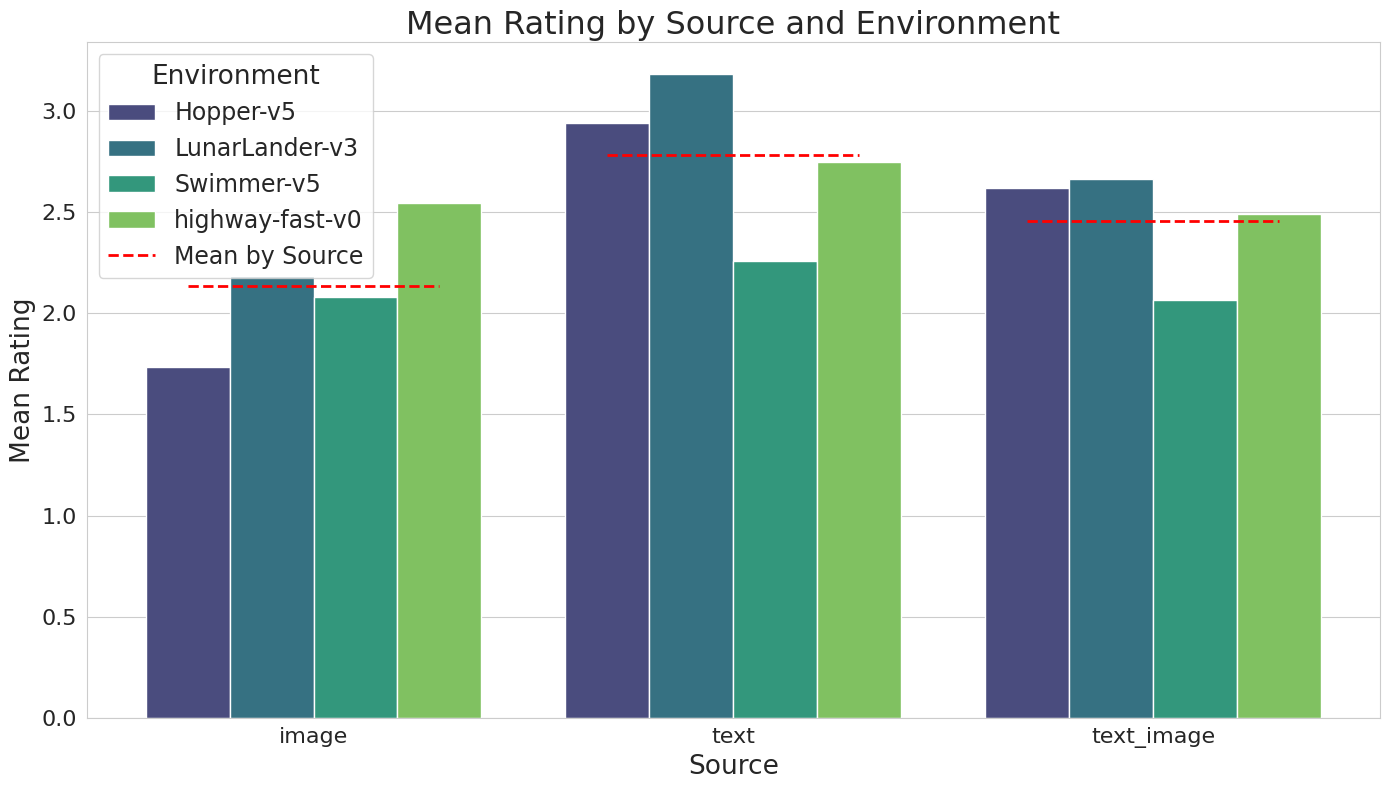

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

mean_ratings_by_env = big_data.groupby(['source', 'environment'])['rating'].mean().reset_index()
mean_ratings_by_source = big_data.groupby('source')['rating'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

ax = sns.barplot(x='source', y='rating', hue='environment', data=mean_ratings_by_env, palette='viridis')

for i, source in enumerate(mean_ratings_by_source['source']):
    mean_value = mean_ratings_by_source.loc[mean_ratings_by_source['source'] == source, 'rating'].values[0]
    ax.plot([i - 0.3, i + 0.3], [mean_value, mean_value], color='red', linewidth=2, linestyle='--', label='Mean by Source' if i == 0 else "")
    
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title('Mean Rating by Source and Environment', fontsize=7+16)
plt.xlabel('Source', fontsize=7+12)
plt.ylabel('Mean Rating', fontsize=7+12)
plt.legend(title='Environment', title_fontsize=7+12, fontsize=7+10, loc='upper left')


plt.tight_layout()
plt.show()


In [40]:
result = big_data.groupby('video_name', as_index=False).agg({
    'environment': 'first',
    'rating': ['mean', 'std'],
    'source': 'first'
})
# Configurer Pandas pour afficher toutes les lignes et colonnes
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns.values]
result = result.sort_values(by=['environment_first', 'rating_mean'], ascending=[True, False])
result

,video_name_,environment_first,rating_mean,rating_std,source_first
8,0_Hopper-v5_365228-episode-0.mp4,Hopper-v5,4.923077,0.277350,text
23,0_Hopper-v5_802611-episode-0.mp4,Hopper-v5,4.833333,0.389249,text_image
21,0_Hopper-v5_76929-episode-0.mp4,Hopper-v5,4.785714,0.425815,text
9,0_Hopper-v5_375905-episode-0.mp4,Hopper-v5,3.928571,0.828742,text_image
29,0_Hopper-v5_991558-episode-0.mp4,Hopper-v5,3.750000,1.055290,text_image
4,0_Hopper-v5_235190-episode-0.mp4,Hopper-v5,3.625000,0.517549,text
3,0_Hopper-v5_228495-episode-0.mp4,Hopper-v5,3.555556,1.247219,text_image
1,0_Hopper-v5_220770-episode-0.mp4,Hopper-v5,3.545455,1.368476,text
11,0_Hopper-v5_51198-episode-0.mp4,Hopper-v5,3.476190,1.470342,text
16,0_Hopper-v5_627340-episode-0.mp4,Hopper-v5,3.411765,1.003670,image
